In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None) 

path = ""
# 
input_file = path + 'Data_Breach_Notifications_Short_File.csv'
df = pd.read_table(input_file, delimiter=',', header=[0])
df.info(verbose = True, show_counts=True)


C:\Users\gtash\AppData\Local\Temp\ipykernel_22060\189646463.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Name                           740 non-null    object 
 1   Id                             740 non-null    int64  
 2   WashingtoniansAffected         714 non-null    float64
 3   Year                           740 non-null    int64  
 4   DaysToIdentifyBreach           632 non-null    float64
 5   DaysElapsedBeforeNotification  723 non-null    float64
dtypes: float64(3), int64(2), object(1)
memory usage: 34.8+ KB


In [2]:
df.describe()

df.describe().to_csv(path + "Descriptive Stats.csv")


In [3]:
# There is strong positive correlations on more individuals affected which is correspond to more days to identify.
# There is a negative correlation (more affected inviduals correspond to fewer days to breach)
# In conclusion this helps assess and interpret the correlation between the number of Washingtonians affected by the data breach and the days taken to 
# identy the breach.
df_cont = df[["WashingtoniansAffected", "DaysToIdentifyBreach", "DaysElapsedBeforeNotification"]]
correlation_matrix = df_cont.corr()

print(correlation_matrix)


                               WashingtoniansAffected  DaysToIdentifyBreach  \
WashingtoniansAffected                       1.000000             -0.025976   
DaysToIdentifyBreach                        -0.025976              1.000000   
DaysElapsedBeforeNotification               -0.060966             -0.079481   

                               DaysElapsedBeforeNotification  
WashingtoniansAffected                             -0.060966  
DaysToIdentifyBreach                               -0.079481  
DaysElapsedBeforeNotification                       1.000000  


Density Plot for DaysToIdentifyBreach DaysToIdentifyBreach


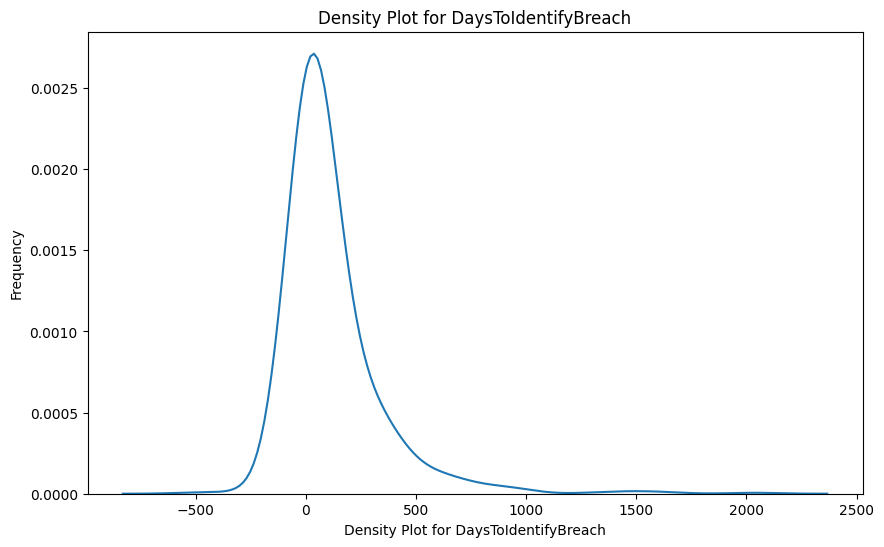

In [6]:
# density plot for DaysToIdentifyBreach
import seaborn as sns 
import matplotlib.pyplot as plt 

var_name = "DaysToIdentifyBreach"
var_title = "Density Plot for " + var_name
print(var_title, var_name)  

fig, ax = plt.subplots(figsize=(10, 6))  
plt.ticklabel_format(style='plain')
plt.xlabel(var_title)
plt.ylabel("Frequency")
plt.title(var_title)


# plotting density plot for carat using distplot() 
sns.kdeplot(np.array( df[ var_name ] ), bw_method = 0.5)
  
# visualizing plot using matplotlib.pyplot library 
# The trails of the plot show how extreme values are distributed. Long tails on the right my indicate some breaches take signicanty longer to identify than others
plt.show() 


Density Plot for DaysElapsedBeforeNotification DaysElapsedBeforeNotification


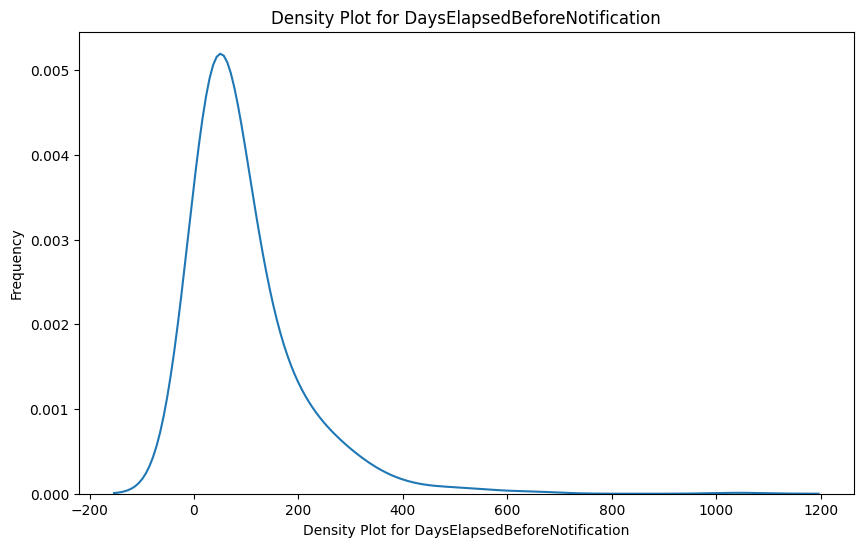

In [7]:
# density plot for DaysElapsedBeforeNotification
import seaborn as sns 
import matplotlib.pyplot as plt 

var_name = "DaysElapsedBeforeNotification"
var_title = "Density Plot for " + var_name
print(var_title, var_name)  

fig, ax = plt.subplots(figsize=(10, 6))  
plt.ticklabel_format(style='plain')
plt.xlabel(var_title)
plt.ylabel("Frequency")
plt.title(var_title)


# plotting density plot for carat using distplot() 
sns.kdeplot(np.array( df[ var_name ] ), bw_method = 0.5)
  
# visualizing plot using matplotlib.pyplot library 
# The density plot indicates how extreme values are distributed and significant delays in notification
# In conclusion the density plot helps to gain insights into the notification processess following data breaches 
plt.show() 
